# TP 1 - Équation de la chaleur
## Schéma explicite

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et schéma explicite :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta x^2} = 0. $$ 

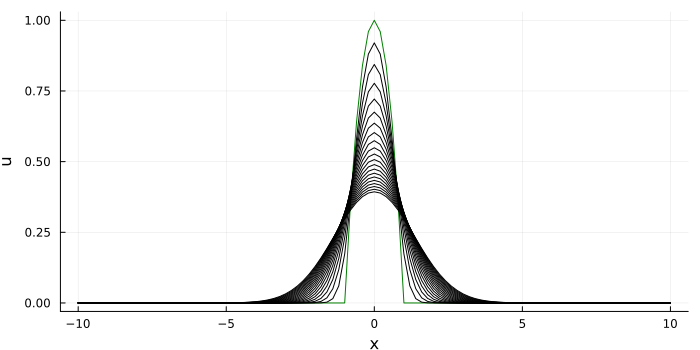

In [61]:
using LinearAlgebra, Plots

# Parameters
L = 10.0                               # domain half size
Nx = 100                               # grid size (space)
Δx = 0.025                           # step size (space)
σ = 0.1                             # CFL
Δt = 0.0000001                          # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition

# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

B = Tridiagonal(σ*ones(Nx), 1 .- 2*σ*ones(Nx+1), σ*ones(Nx))

for n = 1:Nt
    u = B*u
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

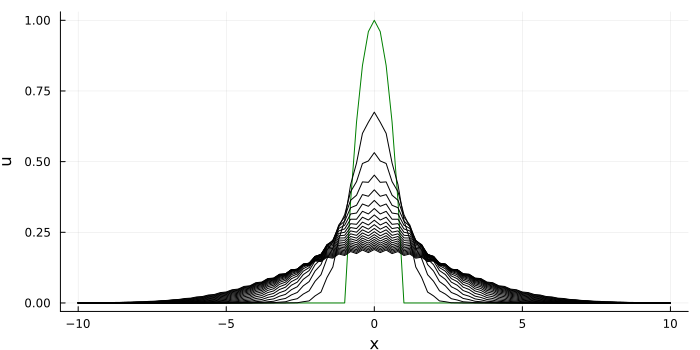

In [69]:
# Parameters
L = 10.0                               # domain half size
Nx = 100                               # grid size (space)
Δx = 2*L/Nx                           # step size (space)
σ = 0.5                             # CFL
Δt = σ * Δx^2                        # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition

# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

B = Tridiagonal(σ*ones(Nx), 1 .- 2*σ*ones(Nx+1), σ*ones(Nx))

for n = 1:Nt
    u = B*u
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

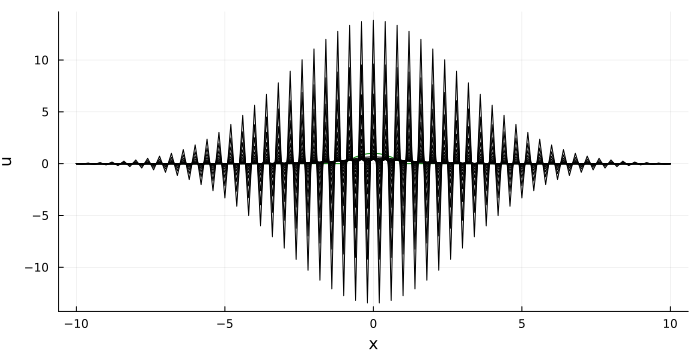

In [70]:
# Parameters
L = 10.0                               # domain half size
Nx = 100                               # grid size (space)
Δx = 2*L/Nx                           # step size (space)
σ = 0.51                             # CFL
Δt = σ * Δx^2                        # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition

# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

B = Tridiagonal(σ*ones(Nx), 1 .- 2*σ*ones(Nx+1), σ*ones(Nx))

for n = 1:Nt
    u = B*u
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

On remarque bien que la condition de stabilité qui n'est plus satisfaite pour σ > 1/2

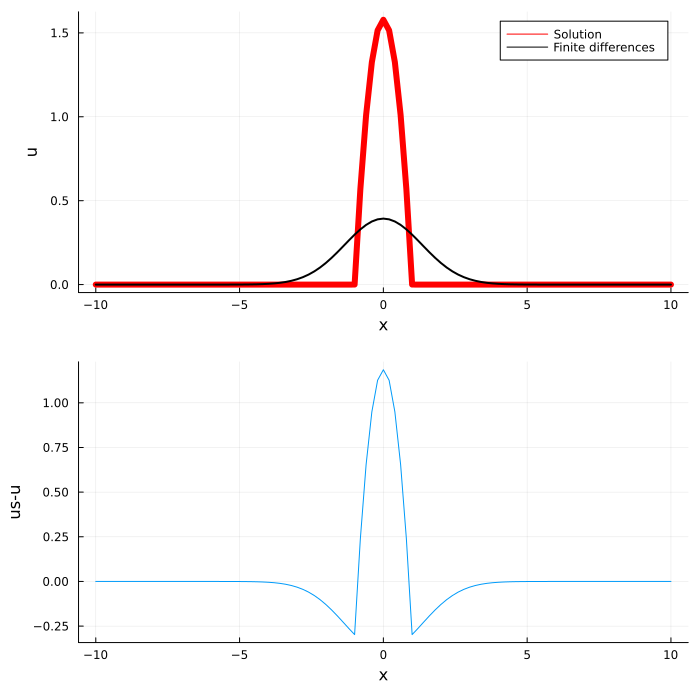

Δx: 0.025	 Δt:1.0e-7	 max error: 1.1849723569101172


In [62]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

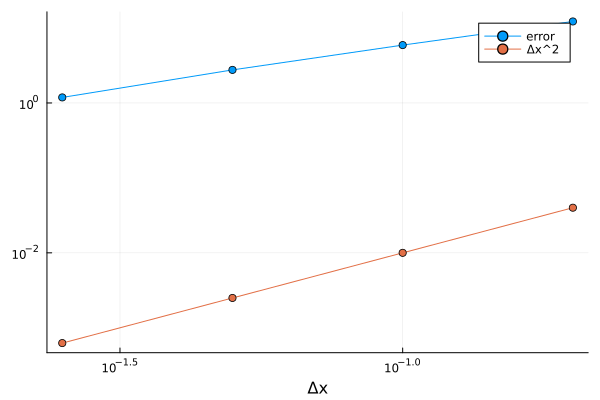

In [67]:
# Precision test
Δx = [ 0.2,0.1,0.05,0.025]
errx = [ 12.22245197268432,5.91462066763392,2.7607050151088823,1.1849723569101172]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log,marker=:dot, xlabel="Δx", label="Δx^2")

On remarque que l'erreur est parallèle à Δx^2 en échelle logarithmique ce qui confirme l'equation : log(err) = c + 2*log(Δx)
De plus l'erreur diminue lordque Δx diminue c'est a dire lorsque le nombre de points augmente